In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('A463RD3Q052SBEA.csv')

In [3]:
df.head()

,DATE,A463RD3Q052SBEA
0,1986-01-01,0.063
1,1986-04-01,0.060
2,1986-07-01,0.057
3,1986-10-01,0.057
4,1987-01-01,0.059


In [4]:
df1=pd.read_csv('MCOILWTICO.csv')

In [5]:
df1.head()

,DATE,MCOILWTICO
0,1986-01-01,22.93
1,1986-02-01,15.46
2,1986-03-01,12.61
3,1986-04-01,12.84
4,1986-05-01,15.38


In [6]:
df2=pd.read_csv('CPIAUCSL.csv')

In [7]:
df2.head()

,DATE,CPIAUCSL
0,1986-01-01,109.9
1,1986-02-01,109.7
2,1986-03-01,109.1
3,1986-04-01,108.7
4,1986-05-01,109.0


In [8]:
df1['DATE']=pd.to_datetime(df1['DATE'])

In [9]:
df2['DATE']=pd.to_datetime(df2['DATE'])

In [10]:
df1.set_index('DATE', inplace=True)

In [11]:
df2.set_index('DATE', inplace=True)

In [12]:
df1q=df1.resample('QS').mean()

In [13]:
df2q=df2.resample('QS').mean()

In [14]:
df1.isnull().sum()

MCOILWTICO    0
dtype: int64

In [15]:
df2.isnull().sum()

CPIAUCSL    0
dtype: int64

In [16]:
df1q=df1q.reset_index()

In [17]:
df2q=df2q.reset_index()

In [18]:
df1q=df1q.round(2)

In [19]:
df1q.head()

,DATE,MCOILWTICO
0,1986-01-01,17.00
1,1986-04-01,13.88
2,1986-07-01,13.85
3,1986-10-01,15.41
4,1987-01-01,18.23


In [20]:
df2q=df2q.round(2)

In [21]:
df2q.head()

,DATE,CPIAUCSL
0,1986-01-01,109.57
1,1986-04-01,109.03
2,1986-07-01,109.70
3,1986-10-01,110.47
4,1987-01-01,111.80


In [22]:
df['profit_margin']=df['A463RD3Q052SBEA']

In [23]:
df2q['cpi']=df2q['CPIAUCSL']

In [24]:
df1q['oil_price']=df1q['MCOILWTICO']

In [25]:
df['cpi']=df2q['cpi']

In [26]:
df['oil_price']=df1q['MCOILWTICO']

In [31]:
df=df.drop('A463RD3Q052SBEA',1)

<ipython-input-31-79e3b7245165>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('A463RD3Q052SBEA',1)


### we insert our dataset and after a bit of engineering we have our dataset , which has 144 rows

In [32]:
df.head()

,DATE,profit_margin,cpi,oil_price
0,1986-01-01,0.063,109.57,17.00
1,1986-04-01,0.060,109.03,13.88
2,1986-07-01,0.057,109.70,13.85
3,1986-10-01,0.057,110.47,15.41
4,1987-01-01,0.059,111.80,18.23


In [33]:
df.shape

(144, 4)

In [34]:
df.corr()

,profit_margin,cpi,oil_price
profit_margin,1.000000,0.904715,0.727264
cpi,0.904715,1.000000,0.735765
oil_price,0.727264,0.735765,1.000000


In [30]:
X=df[['profit_margin','oil_price']]

In [31]:
y=df['cpi']

In [32]:
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [35]:
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [37]:
lr_pred=lr.predict(X_test)

C:\Users\vasia\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
lr.score(X,y)

0.8313567136005828

In [39]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     347.5
Date:                Thu, 19 May 2022   Prob (F-statistic):           3.17e-55
Time:                        16:21:35   Log-Likelihood:                -627.55
No. Observations:                 144   AIC:                             1261.
Df Residuals:                     141   BIC:                             1270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            67.0640      5.314     12.621

### regression has R2 of 0.83 and both variables significant, while polynomial regression gave us a bit better result (0.86) which for me is not much, so maybe linear regression does the job in this case

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.8619871147662691


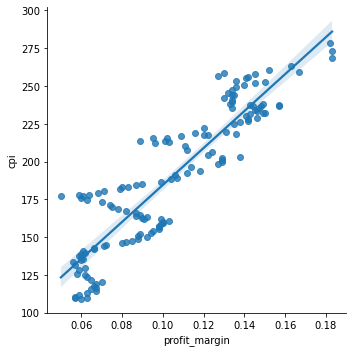

In [41]:
sns.lmplot(x ='profit_margin', y ='cpi', data = df)
 
# Show the plot
plt.show()

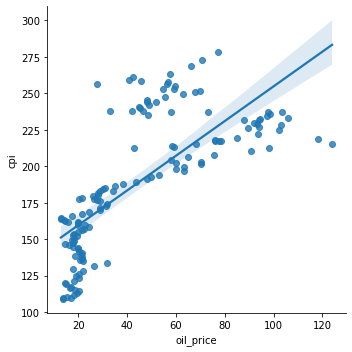

In [42]:
sns.lmplot(x ='oil_price', y ='cpi', data = df)

plt.show()

### lm plots seem to fit well for profit margin and for oil price. For oil price we see that in the beginning of the dataset cpi increased while oil remained at 20 and this may influence a bit the slope of the line. 

### Results seem to confirm that the main drivers of inflation for the last years are energy prices and profit margins. We will return to this dataset to analyze it more in next mini projects